# Measures of Central Tendency, Dispersion, and Shape

Descriptive statistics deals with describing, representing, and summarizing a data sample pertaining to a population. The tools of descriptive statistics can be both numerical and graphical. The analyzed data can be described according to various aspects. Therefore, there are various objective "indicators":
 * **sample size**;
 * **central indicators**: mean, median, mode;
 * **Dispersion indicators**: extremes, range, quantiles, percentiles, quartiles, interquartile range, variance;

To examine these tools, we begin by considering a simple univariate sample:

In [30]:
import numpy as np
import pandas as pd
np.random.seed(42)
data_array = np.random.randint(0,5,size=10).astype(float)
data_array[2] = np.nan
data_array[8] = np.nan
data = pd.Series(data_array)
data

0    3.0
1    4.0
2    NaN
3    4.0
4    4.0
5    1.0
6    2.0
7    2.0
8    NaN
9    4.0
dtype: float64

The sample contains `NaN` values. These are missing values that for some reason were not detected and will need to be handled appropriately.

## Size

The size of a univariate sample $\{x^{(i)}\}_i^N$ is given by the number of values it contains: $|\{x^{(i)}\}_i^N| = N$. The size of each column can also be different as there may be missing values, generally indicated by `NA` or `NaN`. In our case:

In [31]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10 entries, 0 to 9
Series name: None
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 212.0 bytes


The summary above indicates that, although we have $10$ values, only $8$ of these are non-null.

## Measures of central tendency

Central measures give an approximate idea of the order of magnitude of the sample values.

### Mean

The mean of a sample is defined as the sum of its values divided by its size:

$$\overline X = \frac{1}{N}\sum_i^N x^{(i)}$$

The mean of our sample will be:

In [32]:
data.mean()

np.float64(3.0)

### Median

When the elements of a sample can be ordered (for example, if they are numerical values), the median of a sample (or the median element) is the element that divides the ordered set of sample values into two equal parts.

The median element can be obtained by ordering the sample values and proceeding as follows:

* If the number of elements is odd, take the central element. For example $[1,2,\mathbf{2},3,5] \to 2$.
* If the number of elements is even, take the average of the two central ones. For example $[1,2,\mathbf{2},\mathbf{3},3,5] \to \frac{2+3}{2} = 2.5$.

In the case of our sample:

In [33]:
print(data.sort_values())
print("Median value:",data.median())

5    1.0
6    2.0
7    2.0
0    3.0
1    4.0
3    4.0
4    4.0
9    4.0
2    NaN
8    NaN
dtype: float64
Median value: 3.5


From a formal point of view, if we have $n$ observations $x^{(1)}, \ldots, x^{(n)}$, which can be ordered as $x^{(i_i)},\ldots, x^{(i_n)}$, the calculation of the median can be expressed as follows:

$$
\tilde x_{0.5} = \begin{cases}
x_{(n+1)/2} & \text{if } n \textit{ is odd}\\
    \frac{1}{2}(x_{n/2}+x_{n/2+1}) & \text{otherwise.}
\end{cases}
$$

### Quantiles, Percentiles, and Quartiles

Quantiles, percentiles, and quartiles generalize the concept of the median.

#### Quantiles
A quantile of order $\alpha$ is a value $q_\alpha$ that divides a sample into two parts with sizes proportional to $\alpha$ and $1-\alpha$. Values less than or equal to $q_\alpha$ belong to the first part of the division, while values greater than $q_\alpha$ belong to the second part.

For example, given the already ordered sample `[1,2,3,3,4,5,6,6,7,8,8,9]`, a quantile $q_{0.25}$ will divide the sample into two parts with sizes proportional to $0.25$ and $1-0.25=0.75$. In this case $q_{0.25}=3$ and the two parts will be `[1,2,3,3]` and `[4,5,6,6,7,8,8,9]`.

In this case too, as with the median, averages of adjacent values are taken where appropriate.

Quantiles should be interpreted as follows:

> If a quantile of order $\alpha$ is equal to the number $x$, then it means that $\alpha \times n$ elements have a value less than or equal to $x$, where $n$ is the number of elements in the sample.

It should be noted that:
* The minimum is a quantile of order 0;
* The maximum is a quantile of order 1;
* The median is a quantile of order 0.5.

Let's see some examples on our small sample:

In [34]:
print("Order 0 Quantile (minimum):", data.quantile(0))
print("Order 0.5 Quantile (median):", data.quantile(0.5))
print("Order 1 Quantile (maximum):", data.quantile(1))
print("Order 0.15 Quantile:", data.quantile(0.15))

Order 0 Quantile (minimum): 1.0
Order 0.5 Quantile (median): 3.5
Order 1 Quantile (maximum): 4.0
Order 0.15 Quantile: 2.0


From the above data we deduce that:
* $50\%$ of the values are less than or equal to 3;
* $15\%$ of the values are less than or equal to 2.

#### Percentiles
Percentiles are simply quantiles expressed as a percentage. A quantile of order $0.25$ is a percentile of order $25\%$.

#### Quartiles

Quartiles are specific quantiles that divide the sample into four parts. In particular:

* The quartile of order 0 is a quantile of order 0;
* The quartile of order 1 is a quantile of order $1/4=0.25$;
* The quartile of order 2 is a quantile of order $2/4=0.5$;
* The quartile of order 3 is a quantile of order $3/4=0.75$;
* The quartile of order 4 is a quantile of order $4/4=1$.

Let's look at some examples on our small sample:

In [35]:
print("Quartile of order 0 (minimum):", data.quantile(0/4))
print("Quartile of order 1:", data.quantile(1/4))
print("Quartile of order 2 (median):", data.quantile(2/4))
print("Quartile of order 3:", data.quantile(3/4))
print("Quartile of order 4 (maximum):", data.quantile(4/4))

Quartile of order 0 (minimum): 1.0
Quartile of order 1: 2.0
Quartile of order 2 (median): 3.5
Quartile of order 3: 4.0
Quartile of order 4 (maximum): 4.0


### Moda
La moda di un campione è l'elemento che si ripete più spesso. Ad esempio, consideriamo il seguente campione:

In [36]:
data=pd.Series([1,2,3,4,2,5,4,2,6,5,8,4,3,2,3])
data

0     1
1     2
2     3
3     4
4     2
5     5
6     4
7     2
8     6
9     5
10    8
11    4
12    3
13    2
14    3
dtype: int64

So, let's consider the absolute frequencies:

In [37]:
data.value_counts()

2    4
3    3
4    3
5    2
1    1
6    1
8    1
Name: count, dtype: int64

The mode will be equal to $4$.

In formal terms, the mode $\overline x_M$ of the previously seen sample is given by:

$$\overline x_M = a_j \Leftrightarrow n_j = \max\{n_1,\ldots,n_k\}$$

Where $a_j$ are the unique values of the sample and $n_j$ are their respective frequencies.

## Measures of Dispersion

Measures of dispersion serve to quantify to what extent the values of a distribution are "dispersed", or "far from each other".

### Minimum, Maximum, and Range
Simple indices of dispersion are the minimum ($min \{x^{(i)}\}_i^N$), the maximum ($max \{x^{(i)}\}_i^N$), and the range ($max \{x^{(i)}\}_i^N$ - $min \{x^{(i)}\}_i^N$). Returning to the last example:

In [38]:
# This is an example file for managing data.

raw_data = [10, 25, 15, 30, 20] # List of numerical values
user_name = "Mario Rossi" # User's name

def process_data(input_list):
    """
    This function processes a list of data.
    """
    if not input_list:
        print("Warning: the list is empty!")
        return []

    processed_result = [value * 2 for value in input_list]
    return processed_result

print("Starting data processing...")
new_data = process_data(raw_data)
print(f"Original data: {raw_data}")
print(f"Processed data: {new_data}")
print(f"Current user: {user_name}")
# End of process.

Starting data processing...
Original data: [10, 25, 15, 30, 20]
Processed data: [20, 50, 30, 60, 40]
Current user: Mario Rossi


We will have that:

In [39]:
print("Minimum:", data.min())
print("Maximum:", data.max())
print("Range:", data.max() - data.min())

Minimum: 1
Maximum: 8
Range: 7


### Interquartile Range

The range is not a very robust measure of dispersion, as it does not take into account the presence of any outliers. Consider, for example, the following "artificial" samples:

In [40]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
sample1 = np.linspace(3,7,10)
sample2 = sample1.copy()
sample2[0]=-5 # we replace two values with the outliers -5
sample2[-1]=15 # and 15

df = pd.DataFrame({'s1':sample1,'s2':sample2})
print(df)

# df.plot.box()
# plt.grid()
# plt.show()

print("Range sample 1:",df['s1'].max()-df['s1'].min())
print("Range sample 2:",df['s2'].max()-df['s2'].min())

         s1         s2
0  3.000000  -5.000000
1  3.444444   3.444444
2  3.888889   3.888889
3  4.333333   4.333333
4  4.777778   4.777778
5  5.222222   5.222222
6  5.666667   5.666667
7  6.111111   6.111111
8  6.555556   6.555556
9  7.000000  15.000000
Range sample 1: 4.0
Range sample 2: 20.0


The samples are similar, but the presence of two outliers (-5 and 15) in the second sample makes the ranges very different (4 and 20).

A somewhat more expressive measure of dispersion is therefore the **interquartile range** (or **interquartile distance**), which is measured as the difference between the third and first quartiles:

In [41]:
q11,q13 = df['s1'].quantile([1/4,3/4])
q21,q23 = df['s2'].quantile([1/4,3/4])
print("The interquartile range of sample 1 is:",q13-q11)
print("The interquartile range of sample 2 is:",q23-q21)

The interquartile range of sample 1 is: 2.0
The interquartile range of sample 2 is: 2.0


### Variance and Standard Deviation

Variance (also known as mean squared deviation) provides an estimate of how much the observed data deviate from the mean. Variance calculates the mean of the squares of the deviations of the values from the mean, penalizing large deviations from the mean value (due to outliers) more heavily than small deviations:

$$s^2 = \frac{\sum_{i=1}^n(x_i-\overline x)^2}{n}$$

Here we use the symbol $s$ instead of the symbol $\sigma$ seen in the case of probability distributions, because $s$ is a value "estimated" from the data and not "theoretical" as in the case of $\sigma$. It should be noted, however, that in practice, there is no universal convention, so in many cases $\sigma$ is also used for estimated values.

We can attribute a geometric meaning to variance, as shown in the graph below:

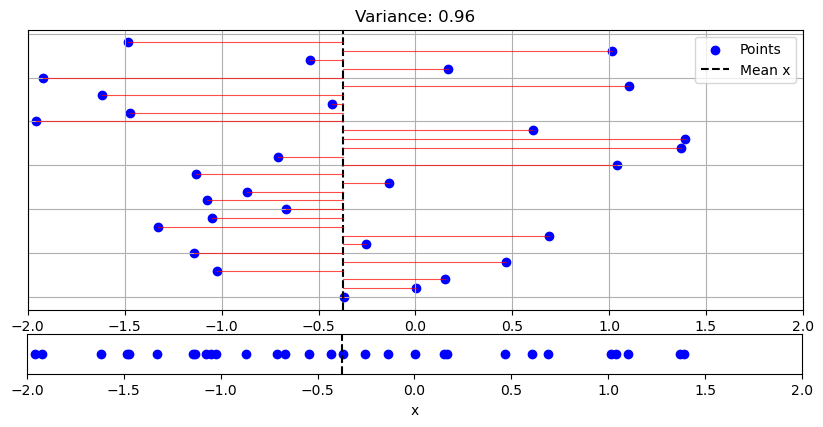

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(41)
n = 30
x = np.random.randn(n) -0.1
y = np.arange(n)

# Calculate the mean of the x component
mean_x = np.mean(x)

# Create the 2D plot
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.title(f"Variance: {np.var(x):0.2}")
plt.scatter(x, y, label='Points', color='blue')

# Plot the mean of x as a black dashed line
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')

# Plot red lines connecting points to the mean x
for i in range(n):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r-', linewidth=0.8, alpha=0.7)

# Axis labels and legend
plt.xlabel('')
plt.ylabel('')
plt.legend()
# Remove numbers and ticks on the y-axis of the top subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.grid()
plt.xlim([-2,2])

plt.subplot(212)
plt.scatter(x, np.zeros_like(x), label='Points', color='blue')
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')
plt.xlim([-2,2])

# Adjust the dimensions of the bottom subplot
plt.gca().set_position([0.124, 0.45, 0.775, 0.05])
plt.xlabel('x')
# Remove labels and numbers on the y-axis of the bottom subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.show()

In the graph, the bottom plot shows a univariate sample $\{x_i\}_i^N$. The top plot shows the same sample "exploded" on the $y$-axis for visualization purposes. In the top plot, the black dashed line indicates the sample mean, while the red lines are the terms $(x_i-\overline x)$ that appear in the variance formula. The variance calculates the average of the lengths of these segments.

The following graph shows a less "dispersed" sample:

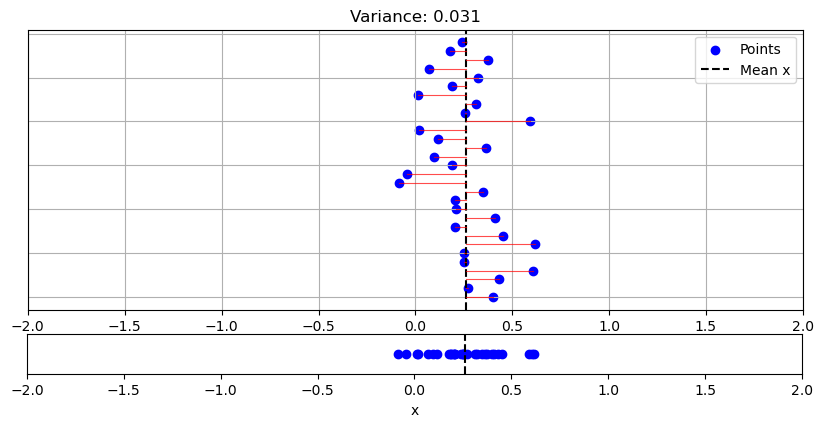

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(42)
n = 30
x = np.random.randn(n)*0.2+0.3
y = np.arange(n)

# Calculate the mean of the x component
mean_x = np.mean(x)

# Create the 2D plot
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.title(f"Variance: {np.var(x):0.2}")
plt.scatter(x, y, label='Points', color='blue')

# Plot the mean of x as a dashed black line
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')

# Plot red lines connecting the points to the x mean
for i in range(n):
    plt.plot([x[i], mean_x], [y[i], y[i]], 'r-', linewidth=0.8, alpha=0.7)

# Axis labels and legend
plt.xlabel('')
plt.ylabel('')
plt.legend()
# Remove numbers and ticks on the y-axis of the top subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.grid()
plt.xlim([-2,2])

plt.subplot(212)
plt.scatter(x, np.zeros_like(x), label='Points', color='blue')
plt.axvline(x=mean_x, color='black', linestyle='--', label='Mean x')
plt.xlim([-2,2])

# Adjust the dimensions of the bottom subplot
plt.gca().set_position([0.124, 0.45, 0.775, 0.05])
plt.xlabel('x')
# Remove labels and numbers on the y-axis of the bottom subplot
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.show()

The variance of our small sample will be:

In [44]:
data.var()

3.4

The dispersion indices seen so far (excluding variance) have the same unit of measurement as the input data. In the case of weights, the data are measured in pounds. It is therefore correct to say that **minimum**, **maximum**, **range**, **interquartile range**, and **mean absolute deviation** calculated on weights are measured in pounds.

The same does not apply to the variance, which will be measured in **pounds squared**. If we want to obtain a **commensurable** measure of dispersion, we can calculate the square root of the variance, thus obtaining the **standard deviation** (or **root mean square deviation**), which is defined as follows:

$$s = \sqrt{s^2}=\sqrt{\frac{\sum_{i=1}{n}(x_i-x^2)}{n}}$$

Let's reconsider our dataset of weights and heights. The means and standard deviations for the weight variable for the two sexes are:

In [45]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205
del hw['BMI']
desc = hw.groupby('sex')['height'].describe().T
desc.iloc[[1,2]]

sex,F,M
mean,64.179431,69.933710
std,2.686187,2.911766


From the comparison we note that the heights of the men are "more dispersed" (that is, they have a higher standard deviation). Let's compare the density estimates of the two samples:

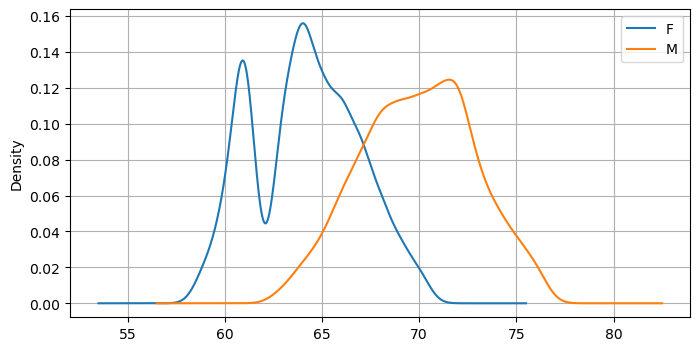

In [46]:
hw.groupby('sex')['height'].plot.density(figsize=(8,4))
plt.grid()
plt.legend()
plt.show()

We note that in fact the density estimate for men has identified a more "bulged" curve, which correlates well with the higher standard deviation.

### Data Normalizations
The observed data dispersion indicators strongly depend on the nature of the data and their unit of measurement. For example, ages are measured in years, while weights are in Kg or pounds. Therefore, there are data normalization techniques that make data based on different units of measurement comparable to each other.

#### Normalization between 0 and 1
This normalization scales the data so that the minimum and maximum values are exactly equal to $0$ and $1$, using the following formula:

$$
x_{norm} = (x-x_{min})/(x_{max}-x_{min})
$$

In the case of our sample, we would obtain:

In [47]:
data_norm = (data-data.min())/(data.max()-data.min())
data_norm

0     0.000000
1     0.142857
2     0.285714
3     0.428571
4     0.142857
5     0.571429
6     0.428571
7     0.142857
8     0.714286
9     0.571429
10    1.000000
11    0.428571
12    0.285714
13    0.142857
14    0.285714
dtype: float64

#### Normalization between -1 and 1
In this case, the data are rescaled so that the new minimum and maximum are $-1$ and $1$, using the following formula:

$$
x_{norm} = (x_{max}+x_{min}-2\cdot x)/(x_{max}-x_{min})
$$

We can perform this transformation in Pandas as follows:

In [48]:
data_norm2 = (data.max()+data.min()-2*data)/(data.max()-data.min())
data_norm2

0     1.000000
1     0.714286
2     0.428571
3     0.142857
4     0.714286
5    -0.142857
6     0.142857
7     0.714286
8    -0.428571
9    -0.142857
10   -1.000000
11    0.142857
12    0.428571
13    0.714286
14    0.428571
dtype: float64

#### Standardization (z-scoring)

In many cases, it is useful to normalize data so that they have zero mean and unit standard deviation. This type of normalization is called "z-scoring" and is performed by subtracting the mean from the data and dividing by the standard deviation.

$$
z_i = \frac{x_i-\overline x}{s_x}
$$

where $s_x$ is the standard deviation of the population to which $X$ belongs. Note that zeta scores are **dimensionless** (i.e., they have no unit of measurement).

To understand the effect of this normalization, let's observe the density estimates of the samples before and after normalization:

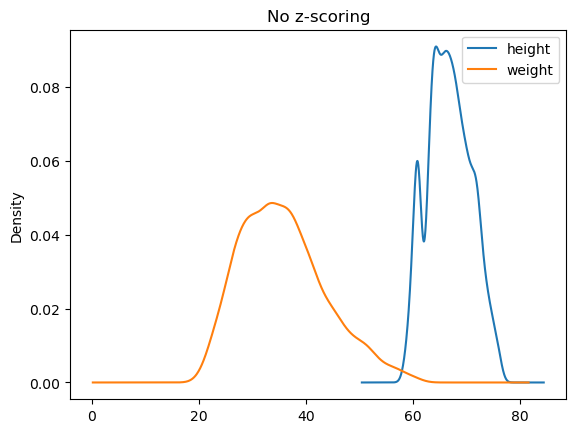

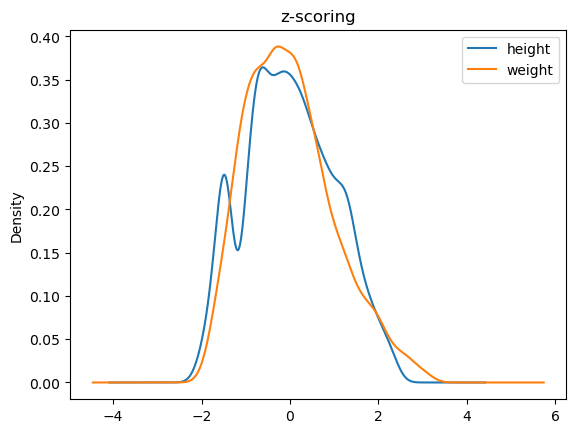

In [49]:
from scipy.stats import zscore
hwz = hw.copy()
hwz['height'] = zscore(hwz['height'])
hwz['weight'] = zscore(hwz['weight'])

hw.plot.kde()
plt.title('No z-scoring')
plt.show()

hwz.plot.kde()
plt.title('z-scoring')
plt.show()

### Shape Indicators
Let's now look at some indicators that allow us to get an idea of certain aspects of the "shape" of data distribution.

#### Asymmetry (skewness)
Skewness is an indicator of the "imbalance" to the left (negative value) or to the right (positive value) of a data sample with respect to the central value. The formula for skewness is as follows:

$$ \sum_i^n \frac{(x_i-\overline x)^3}{n \cdot s_x^3}$$

The skewness values will be:
* **Negative** if the distribution is skewed to the left;
* **Positive** if the distribution is skewed to the right;
* **Close to zero** in the case of unskewed distributions.

Let's look at some examples:

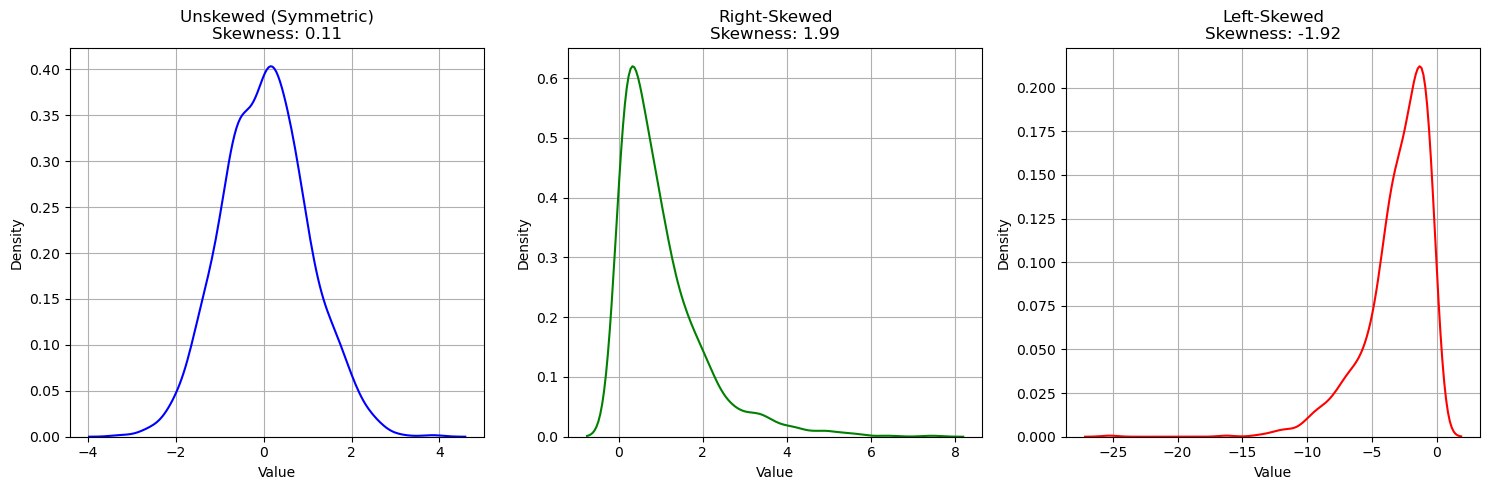

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Generate example data distributions
data_unskewed = np.random.normal(0, 1, 1000)  # Normal distribution (symmetric)
data_right_skewed = np.random.exponential(1, 1000)  # Exponential distribution (right-skewed)
data_left_skewed = -np.random.chisquare(3, 1000)  # Chi-squared distribution (left-skewed)

# Calculate skewness values
skewness_unskewed = stats.skew(data_unskewed)
skewness_right_skewed = stats.skew(data_right_skewed)
skewness_left_skewed = stats.skew(data_left_skewed)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot unskewed distribution with KDE
sns.kdeplot(data_unskewed, ax=axes[0], color='blue')
axes[0].set_title(f"Unskewed (Symmetric)\nSkewness: {skewness_unskewed:.2f}")

# Plot right-skewed distribution with KDE
sns.kdeplot(data_right_skewed, ax=axes[1], color='green')
axes[1].set_title(f"Right-Skewed\nSkewness: {skewness_right_skewed:.2f}")

# Plot left-skewed distribution with KDE
sns.kdeplot(data_left_skewed, ax=axes[2], color='red')
axes[2].set_title(f"Left-Skewed\nSkewness: {skewness_left_skewed:.2f}")

# Add labels and show the plot
for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.grid(True)

plt.tight_layout()
plt.show()

The skewness values of weights and heights will be:

In [51]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205
del hw['BMI']

print(f"Skewness weights: {hw['weight'].skew():0.2f}")
print(f"Skewness height: {hw['height'].skew():0.2f}")

Skewness weights: 0.57
Skewness height: 0.14


#### Kurtosis (kurtosis)
The kurtosis index measures the "thickness" of the tails of a density distribution. It is defined as follows:

$$
K = \frac{1}{n} \sum_{i=1}^{n} \left(\frac{X_i - \bar{X}}{s}\right)^4 - 3
$$

The index is interpreted as follows:
 * If it is greater than zero, the distribution is *leptokurtic*, i.e., more "peaked" than a Normal distribution;
 * If it is less than zero, the distribution is *platykurtic*, i.e., more "flat" than a Normal distribution;
 * If it is equal to zero, the distribution is *mesokurtic*, i.e., the tails are similar to those of a normal distribution.

We will see what a normal distribution is later in the course. Let's look at some examples of Kurtosis values:

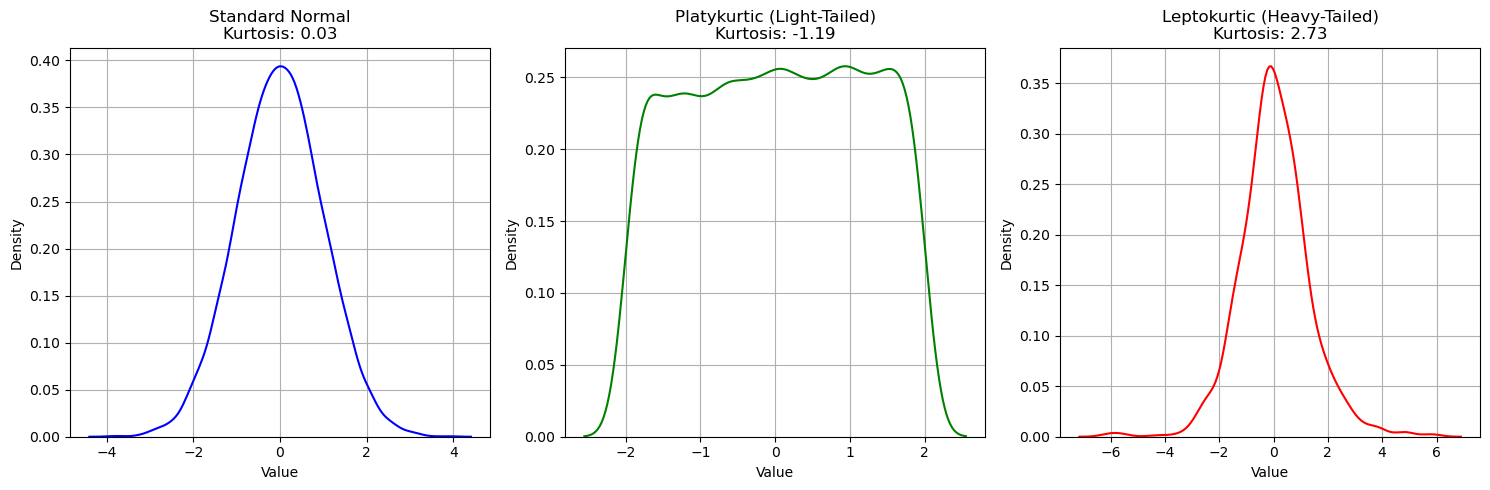

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

np.random.seed(42)
# Generate example data for different distributions
normal_data = np.random.normal(0, 1, 10000)  # Standard normal distribution
platykurtic_data = np.random.uniform(-2, 2, 10000)  # Platykurtic distribution (light-tailed)
leptokurtic_data = np.random.standard_t(5, 1000)  # Leptokurtic distribution (heavy-tailed)

# Calculate kurtosis values
kurtosis_normal = stats.kurtosis(normal_data)
kurtosis_platykurtic = stats.kurtosis(platykurtic_data)
kurtosis_leptokurtic = stats.kurtosis(leptokurtic_data)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot standard normal distribution (mesokurtic) with KDE
sns.kdeplot(normal_data, ax=axes[0], color='blue')
axes[0].set_title(f"Standard Normal\nKurtosis: {kurtosis_normal:.2f}")

# Plot platykurtic distribution (light-tailed) with KDE
sns.kdeplot(platykurtic_data, ax=axes[1], color='green')
axes[1].set_title(f"Platykurtic (Light-Tailed)\nKurtosis: {kurtosis_platykurtic:.2f}")

# Plot leptokurtic distribution (heavy-tailed) with KDE
sns.kdeplot(leptokurtic_data, ax=axes[2], color='red')
axes[2].set_title(f"Leptokurtic (Heavy-Tailed)\nKurtosis: {kurtosis_leptokurtic:.2f}")

# Add labels and show the plot
for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.grid(True)

plt.tight_layout()
plt.show()

## Boxplot

Boxplots are a compact visualization method for representing certain descriptive characteristics of the data under analysis. In particular, given a sample, a boxplot can effectively represent the following quantities:
 * Median value;
 * First and third quartile;
 * Minimum and maximum (depending on the boxplot's "version," as discussed below).

A boxplot appears as follows:

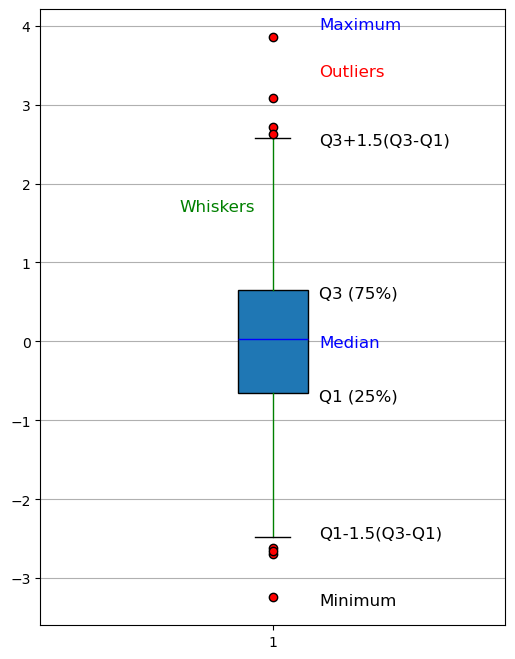

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# Create a vertical boxplot with explanatory labels
plt.figure(figsize=(6, 8))
box = plt.boxplot([data], vert=True, patch_artist=True, medianprops={'color': 'blue'}, flierprops={'markerfacecolor':'red'}, whiskerprops=dict(color='green'))

IQR = np.percentile(data, 75) - np.percentile(data, 25)

# Explanatory labels
plt.text(1.1, np.min(data) - 0.1, 'Minimum', fontsize=12, color='black')
plt.text(1.1, np.percentile(data, 25) - 0.1, 'Q1 (25%)', fontsize=12, color='black')
plt.text(1.1, np.median(data) - 0.1, 'Median', fontsize=12, color='blue')
plt.text(1.1, np.percentile(data, 75) - 0.1, 'Q3 (75%)', fontsize=12, color='black')
plt.text(1.1, np.max(data) + 0.1, 'Maximum', fontsize=12, color='blue')
plt.text(1.1, np.max(data) - 0.5, 'Outliers', fontsize=12, color='red')
plt.text(0.8, np.percentile(data, 75) +1, 'Whiskers', fontsize=12, color='green')

plt.text(1.1, np.percentile(data, 75) + 1.5*(IQR)-0.1, 'Q3+1.5(Q3-Q1)', fontsize=12, color='black')
plt.text(1.1, np.percentile(data, 25) - 1.5*(IQR)+0.1, 'Q1-1.5(Q3-Q1)', fontsize=12, color='black')

# Titles and axis labels
plt.grid(axis='y')

plt.show()

The boxplot is shown as a "box" with "whiskers" where:
 * the bottom edge of the box indicates the first quartile;
 * the top edge of the box indicates the third quartile;
 * the horizontal line in the middle of the box represents the median value of the sample;
 * the lower whisker represents the first value in the sample that is greater than or equal to the first quartile minus one and a half times the distance between the third and the first quartile;
 * the upper whisker represents the first value in the sample that is less than or equal to the third quartile plus one and a half times the distance between the third and the first quartile;
 * the dots represent the "out-of-bounds" values that fall outside the interval marked by the whiskers. They are generally considered as "outliers".

To illustrate the usefulness of boxplots, we will consider the dataset of weights and heights seen previously:

In [54]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205
del hw['BMI']
hw

,sex,height,weight
0,M,74,53.484771
1,M,70,38.056472
2,F,61,34.970812
3,M,68,35.999365
4,F,66,34.559390
...,...,...,...
4226,F,69,23.862436
4227,M,69,38.262182
4228,F,64,34.970812
4229,F,64,28.388071


We show the **statistical summary**, that is, the list of all the descriptive statistics indicators discussed so far:

In [55]:
hw['weight'].describe()

count    4231.000000
mean       35.818062
std         7.987908
min        20.571066
25%        29.828045
50%        34.970812
75%        41.142132
max        61.301776
Name: weight, dtype: float64

The boxplot of the heights is presented as follows:

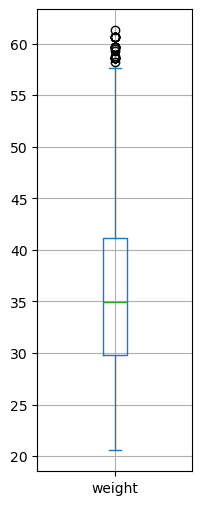

In [56]:
from matplotlib import pyplot as plt
hw['weight'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Boxplots can be useful to compare samples. For example, the following boxplots compare the distributions of weights between men and women:

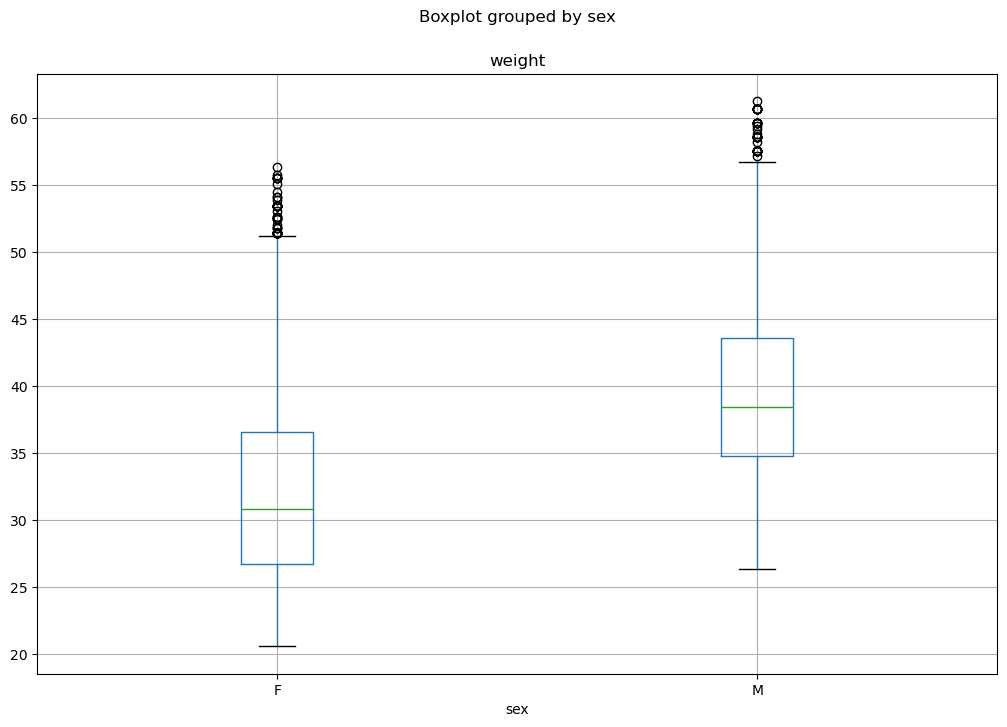

In [57]:
hw.boxplot(column='weight', by='sex', figsize=(12,8))
plt.show()

From the graph above, we can note that weight has different distributions in males and females, with males overall weighing more, as one would expect.

## References

* Chapter 3 of: Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.